# Titanic Data Analysis

## Background Information
__Supplied by Kaggle website - __

-  The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.


-  One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
   

## Descriptions of dataset columns

__Survived__ - Survied (1), Died (0)

__pclass__ - Ticket class. Upper(1), Middle(2), Lower(3)

__SibSp__ - Can be a sibling(brother, sister, stepbrother, stepsister) or spouse(husband, wife)

__Parch__ - Can be a parent (mother, father) or child (daughter, son, stepdaughter, stepson)

__Embarked__ - C = Cherbourg, Q = Queenstown, S = Southampton

## Questions

__Question 1__ - What were the passenger counts for each class?

__Question 2__ - Did gender have an impact on survival? If so, for what age group was this most apparent?

__Question 3__ - Did child survival rates differ between the classes?

__Question 4__ - Was the survival rate for fathers with children on board better than that for men with no children on board?

__Question 5__ - Did single women have a higher survival rate than those with husbands on board?

## Assessing

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Gathering Data

Datasets were provided by Kaggle and have been downloaded in csv format to a local directory.

We will read in the training and testing datasets into separate datasets saved as train_df and test_df. Additionally, we will combine these as a number of cleaning activities will need to be applied to both datasets and this will be saved as complete_df.

In [2]:
# Reading in titanic dataset into a dataframe named titanic_df.
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
complete_df = [train_df, test_df]

### Assessing Data

We can sample the data to get a better sense of the format and examine descriptive statistics to provide some initial information. Additionally we can see what data is missing and the areas that need cleaning.

#### Visual Inspection of Training Dataset

In [3]:
# Sampling the first five rows of the training data.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Descriptive statistics for all columns in training data.
train_df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Odahl, Mr. Nils Martin",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
# Datatypes and counts for all columns in training data.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# Checking for duplicates
train_df.duplicated().sum()

0

In [7]:
#Checking the unique values in each column. 
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

#### Initial Observations

- 891 total samples
- Survived is a binary variable with a mean of 0.38. We can see that 38% of samples survived in this training set.
- Mean passenger age was 30
- More than 3/4 of passengers did not travel with parents or children


### Data Issues

We can see that there are a number of data issues that need to be resolved before any analysis is conducted -

- The age column is missing a significant proportion of values (Approx. 20%). This is a problem as it is most certainly correlated with survival.
- The embarked feature is missing 2 values. 
- Ticket column contains a high number of duplicates and it is unlikely to be correlated with survival so it can be dropped from the dataframe.
- Cabin column contains a high number of missing values and duplicates. One could argue that cabin data is important given that the incident occured quite late at night when the majority of passengers had retired for the night to their cabin. It is assumed that cabin is likely to be highly correlated to pclass anyway. It would be a rarity for a high socioeconomic class passenger to get a cabin that was on the lower decks, and lower socioeconomic class passengers were either restricted from or couldn't afford cabins on the upper decks. For this reason, the cabin column can also be dropped.
- Sex is a string and not a binary int variable
- Embarked is a string and not an int variable

## Cleaning

##### Define

Ticket and cabin variables need to be removed as they contain missing values, duplicates and are unlikely to be useful for the analysis. 

##### Code

In [8]:
# Dropping the Cabin and Ticket columns
for df in complete_df:
    df = df.drop(['Cabin', 'Ticket'], inplace=True, axis=1)

##### Test

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


##### Define

Fill in missing data in the Embarked variable.

##### Code

In [10]:
# Identifying missing embarked values in training set.
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


As we can see above, there are only two missing values for the "Embarked" column in the train dataset. These two passengers share a number of traits. They are both female and 1st class passengers. We will find the most common embarked value for 1st class female passengers and use this to fill in the NaNs for these two passengers. 

In [11]:
# Fill in missing Embarked data with the most common port. 

mode_port = train_df["Embarked"].dropna().mode()[0]

for df in complete_df:
    df["Embarked"] = df["Embarked"].fillna(mode_port)

##### Test

In [12]:
#Testing to see if null values have been fixed.
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


##### Define

Group together fare prices.

##### Code

In [13]:
mean_fare = train_df['Fare'].dropna().mean()

for df in complete_df:
    df['Fare'] = df['Fare'].fillna(mean_fare)
    df["Fare_Group"] = pd.cut(df["Fare"], 7)

##### Test

In [14]:
train_df[['Fare_Group', 'Survived']].groupby(['Fare_Group'], as_index=False).mean()

,Fare_Group,Survived
0,"(-0.512, 73.19]",0.339670
1,"(73.19, 146.38]",0.732394
2,"(146.38, 219.57]",0.733333
3,"(219.57, 292.76]",0.615385
4,"(292.76, 365.949]",NaN
5,"(365.949, 439.139]",NaN
6,"(439.139, 512.329]",1.000000


##### Define

Convert fare column to ordinal variables numbered for each fare group.

##### Code

In [15]:
for df in complete_df:
    df.loc[df['Fare'] <= 40, 'Fare' ] = 0
    df.loc[(df['Fare'] > 40) & (df['Fare'] <= 80), 'Fare' ] = 1
    df.loc[(df['Fare'] > 80) & (df['Fare'] <= 120), 'Fare' ] = 2
    df.loc[(df['Fare'] > 120) & (df['Fare'] <= 160), 'Fare' ] = 3
    df.loc[(df['Fare'] > 160) & (df['Fare'] <= 200), 'Fare' ] = 4
    df.loc[(df['Fare'] > 200), 'Fare' ] = 5

##### Test

In [16]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,0.370370
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,0.947959
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,5.000000


##### Define

Replace name variable with honorific variable.

##### Code

In [17]:
# Extracts the first word ending with a period character and returns a dataframe. 
for df in complete_df:
    df["Honorific"] = df["Name"].str.extract("([a-zA-Z]+)\.", expand = False)

In [18]:
# Drop name column as it is no longer needed.
for df in complete_df:
    df.drop("Name", axis=1, inplace=True)

#### Test

In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Group,Honorific
0,1,0,3,male,22.0,1,0,0.0,S,"(-0.512, 73.19]",Mr
1,2,1,1,female,38.0,1,0,1.0,C,"(-0.512, 73.19]",Mrs
2,3,1,3,female,26.0,0,0,0.0,S,"(-0.512, 73.19]",Miss
3,4,1,1,female,35.0,1,0,1.0,S,"(-0.512, 73.19]",Mrs
4,5,0,3,male,35.0,0,0,0.0,S,"(-0.512, 73.19]",Mr


##### Define

Filling in missing age data.



##### Code

In [20]:
def mean_age(df, pclass, sex, title):
    '''
    Function which takes as inputs the entire titanic dataframe, a pclass and a passenger honorific. The mean and S.D age of passengers 
    with that pclass and title is calculated. Random numbers within +/-1std of the mean are generated for the missing age values.
    '''
    mean_age = train_df.loc[(train_df["Honorific"] == title) & (train_df["Pclass"] == pclass) & (train_df["Sex"] == sex), "Age"].dropna().mean()
    std_age = train_df.loc[(train_df["Honorific"] == title) & (train_df["Pclass"] == pclass) & (train_df["Sex"] == sex), "Age"].dropna().std()
    
    if mean_age < 0:
        length = df.loc[(df["Honorific"] == title) & (df["Pclass"] == pclass) & (df["Sex"] == sex) & (df["Age"].isnull()), "Age"].shape[0]
        est_ages = np.zeros(length, dtype=float)
    
        i=0
        while i < length:
            val = random.uniform((mean_age - std_age), (mean_age + std_age))
            est_ages[i] = val
            i+=1
    
        df.loc[(df["Honorific"] == title) & (df["Pclass"] == pclass) & (df["Sex"] == sex) & (df["Age"].isnull()), "Age"] = est_ages
    
    else:
        df.loc[(df["Honorific"] == title) & (df["Pclass"] == pclass) & (df["Sex"] == sex) & (df["Age"].isnull()), "Age"] = train_df['Age'].mean()
    
    return df

In [21]:
title_list = list(train_df['Honorific'].unique())
for df in complete_df:
    for title in title_list:
        mean_age(df, 1, "male", title)
        mean_age(df, 2, "male", title)
        mean_age(df, 3, "male", title)
        mean_age(df, 1, "female", title)
        mean_age(df, 2, "female", title)
        mean_age(df, 3, "female", title)

#### Test

In [22]:
# Check for any more null age values
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,0.370370
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,0.947959
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,5.000000


#### Define

Grouping passengers into age brackets

For future exploration, it will be much easier for us to work with age group data rather than all ages. For this reason a new column will be created in the dataset that will bin a passengers age into one of six age brackets.

#### Code

In [23]:
for df in complete_df:
    df["Age_Group"] = pd.cut(df["Age"], 6)

The six passenger groups can be considered as - 

- Child
- Adolescence to Young Adult
- Young Adult to Middle Age
- Middle Age to Mature
- Mature to Elderly
- Elderly

#### Test

In [24]:
train_df[['Age_Group', 'Survived']].groupby(['Age_Group'], as_index=False).mean()

,Age_Group,Survived
0,"(0.34, 13.683]",0.591549
1,"(13.683, 26.947]",0.354839
2,"(26.947, 40.21]",0.372038
3,"(40.21, 53.473]",0.390000
4,"(53.473, 66.737]",0.348837
5,"(66.737, 80.0]",0.142857


#### Define

Convert age column to ordinal variables numbered for each age group.

#### Code

In [25]:
for df in complete_df:
    df.loc[df['Age'] <= 13.683, 'Age' ] = 0
    df.loc[(df['Age'] > 13.683) & (df['Age'] <= 26.947), 'Age' ] = 1
    df.loc[(df['Age'] > 26.947) & (df['Age'] <= 40.21), 'Age' ] = 2
    df.loc[(df['Age'] > 40.21) & (df['Age'] <= 53.473), 'Age' ] = 3
    df.loc[(df['Age'] > 53.473) & (df['Age'] <= 66.737), 'Age' ] = 4
    df.loc[df['Age'] > 66.737, 'Age' ] = 5
    df['Age'] = df['Age'].astype('int', copy=False)

#### Test

In [26]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Group,Honorific,Age_Group
0,1,0,3,male,1,1,0,0.0,S,"(-0.512, 73.19]",Mr,"(13.683, 26.947]"
1,2,1,1,female,2,1,0,1.0,C,"(-0.512, 73.19]",Mrs,"(26.947, 40.21]"
2,3,1,3,female,1,0,0,0.0,S,"(-0.512, 73.19]",Miss,"(13.683, 26.947]"
3,4,1,1,female,2,1,0,1.0,S,"(-0.512, 73.19]",Mrs,"(26.947, 40.21]"
4,5,0,3,male,2,0,0,0.0,S,"(-0.512, 73.19]",Mr,"(26.947, 40.21]"


#### Define

Change embarked column to discrete numeric values. Values will be as follows - 

- 0 = Cherbourg
- 1 = Queenstown
- 2 = Southampton

In [27]:
for df in complete_df:
    df.loc[df['Embarked'] == 'C', 'Embarked'] = 0
    df.loc[df['Embarked'] == 'Q', 'Embarked'] = 1
    df.loc[df['Embarked'] == 'S', 'Embarked'] = 2
    df['Embarked'] = df['Embarked'].astype('int', copy=False)

#### Define

Change sex column into numerical binary values as follows - 

0 = male, 1 = female

#### Code

In [28]:
for df in complete_df:
    df.loc[df['Sex'] == 'male', 'Sex'] = 0
    df.loc[df['Sex'] == 'female', 'Sex'] = 1
    df['Sex'] = df['Sex'].astype('int', copy=False)

#### Test

In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Group,Honorific,Age_Group
0,1,0,3,0,1,1,0,0.0,2,"(-0.512, 73.19]",Mr,"(13.683, 26.947]"
1,2,1,1,1,2,1,0,1.0,0,"(-0.512, 73.19]",Mrs,"(26.947, 40.21]"
2,3,1,3,1,1,0,0,0.0,2,"(-0.512, 73.19]",Miss,"(13.683, 26.947]"
3,4,1,1,1,2,1,0,1.0,2,"(-0.512, 73.19]",Mrs,"(26.947, 40.21]"
4,5,0,3,0,2,0,0,0.0,2,"(-0.512, 73.19]",Mr,"(26.947, 40.21]"


## Data Exploration

__Question 1 - What were the passenger counts for each class?__

In [30]:
train_df.groupby("Pclass", as_index=False)["PassengerId"].count()

,Pclass,PassengerId
0,1,216
1,2,184
2,3,491


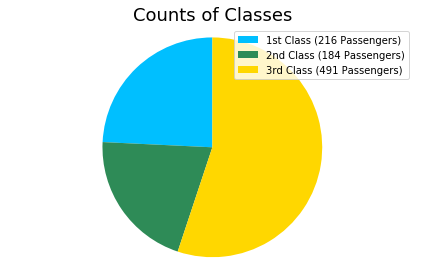

In [31]:
pclasses = train_df.groupby("Pclass")["PassengerId"].count()
labels=["1st Class (216 Passengers)", "2nd Class (184 Passengers)", "3rd Class (491 Passengers)"]
colors = ['deepskyblue', 'seagreen', 'gold']
patches, texts = plt.pie(pclasses, colors=colors, startangle=90)
plt.title('Counts of Classes', fontsize=18)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

There were 216 first class passengers, 184 second class passengers and 491 third class passengers.
The above visual shows that there were more 3rd class passengers on board than 1st and 2nd class combined. 

__Question 2 - Did gender have an impact on survival? If so, for what age group was this most apparent?__

In [32]:
sex_means = train_df.groupby(["Sex"])["Survived"].mean()
train_df.groupby(["Sex"], as_index=False)["Survived"].mean()

,Sex,Survived
0,0,0.188908
1,1,0.742038


We can see from the above printout, that Females had a much higher survival rate at 74% than Males at 19%.

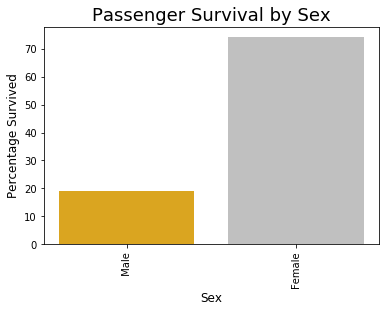

In [33]:
locations = [1, 2]
heights = list(sex_means * 100)
labels=[" Male", "Female"]
colors = ["goldenrod", "silver"]
plt.bar(locations, heights, color=colors)
plt.xticks(locations, labels, rotation = 90)
plt.title('Passenger Survival by Sex', fontsize=18)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Percentage Survived', fontsize=12);

The above visual quickly answers the first part of our question. Gender of the passengers did have an impact on survival rates. The survival rate for females is almost 4 times that for males.

Now we can explore this trend further, by examining survival of males and females in each age group.

In [34]:
train_df.groupby(["Sex", "Age"], as_index=False)["Survived"].mean()

,Sex,Age,Survived
0,0,0,0.567568
1,0,1,0.122581
2,0,2,0.180212
3,0,3,0.215385
4,0,4,0.100000
5,0,5,0.142857
6,1,0,0.617647
7,1,1,0.741935
8,1,2,0.762590
9,1,3,0.714286


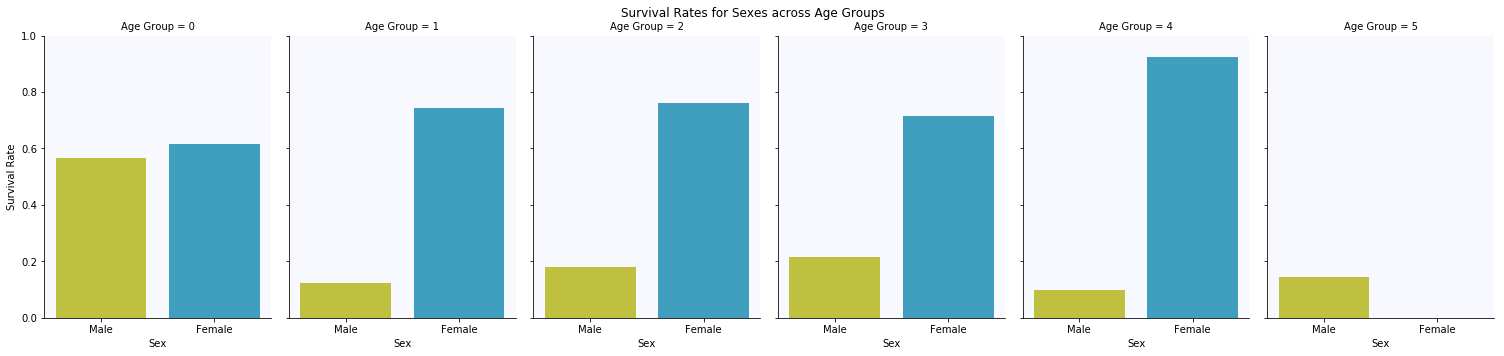

In [35]:
collate = sns.factorplot(x="Sex", y="Survived", col="Age", data=train_df, saturation=0.5, kind="bar", ci=None,
                        size=5, aspect=0.7, palette=["yellow", "deepskyblue"])
collate.set_axis_labels("Sex", "Survival Rate")
collate.set_xticklabels(["Male", "Female"])
collate.set_titles("Age Group = {col_name}")
collate.set(ylim =(0, 1));
collate.set(facecolor = "ghostwhite")
plt.subplots_adjust(top=0.9)
collate.fig.suptitle("Survival Rates for Sexes across Age Groups");

We can see from the above visuals that females in each age group had a higher survival rate than males. Interestingly enough, the females in the Mature-Elderly (53 - 66) age group actually had the highest survival rate of all the female age groups. If we notice the trend in average female survival rates, it appears to improve with age with female children having the lowest survival rate and Mature-Elderly females having the highest survival rate for the sex. Could this trend be because mature women were more likely to be associated with the upper classes? If this is the case then it is possible that socioeconomic class was actually prioritised over the "children first" assumption. In saying that, our cut-off for Child is age 13 which is only todays standard and in the early 20th century, it would likely have been a younger age.

The answer to the second part of our question; what age group was the sex related survival rate difference most apparent, is the Mature-Elderly age group. In this age group the mean survival rate for males was 10% and 92% for females.

__Question 3 - Did child survival rates differ between the classes?__

In the Kaggle description, we are told that children, women and the upper class were more likely to survive. We know from the description that if the dataset is taken as a whole it will show that upper class passengers had a higher survival rate than lower class, but did this same trend also impact children, given that they were given priority for boarding on life boats.

In [36]:
# Creating a filter to select for child passengers. 
child_mask = train_df[train_df["Age"] == 1]

In [37]:
child_mask.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,248.000000,248.000000,248.000000,248.000000,248.0,248.000000,248.000000,248.000000,248.000000
mean,438.540323,0.354839,2.479839,0.375000,1.0,0.431452,0.314516,0.375000,1.596774
std,262.451859,0.479432,0.757952,0.485102,0.0,0.850898,0.683726,1.014321,0.778448
min,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,208.750000,0.000000,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,413.500000,0.000000,3.000000,0.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,677.250000,1.000000,3.000000,1.000000,1.0,1.000000,0.000000,0.000000,2.000000
max,890.000000,1.000000,3.000000,1.000000,1.0,5.000000,3.000000,5.000000,2.000000


A description of our filter shows that the Child age group contains 248 passengers. Mean survival is well below half. Mean Pclass is about 2.47 meaning there is more of the lower class than upper. 

In [38]:
# Grouping child survival data by Pclass.
child_means = child_mask.groupby(["Pclass"])["Survived"].mean()
child_mask.groupby(["Pclass"], as_index=False)["Survived"].mean()

,Pclass,Survived
0,1,0.800000
1,2,0.408163
2,3,0.226415


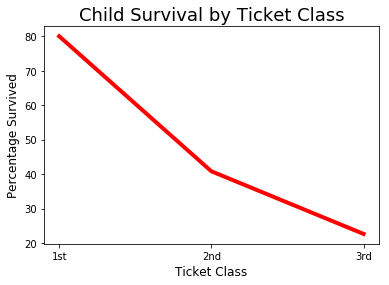

In [39]:
# Plot of Child Survival by Ticket Class. 
locations = [1, 2, 3,]
heights = list(child_means * 100)
labels=["1st", "2nd", "3rd"]
plt.plot(locations, heights, linewidth=4.0, color="r")
plt.xticks(locations, labels)
plt.title('Child Survival by Ticket Class', fontsize=18)
plt.xlabel('Ticket Class', fontsize=12)
plt.ylabel('Percentage Survived', fontsize=12);

The above visual suggests that children holding a higher class ticket did have a higher chance of survival. As survival values are binary, the mean function conveniently provides a mathematical equivalent to proportion. We can see that approximately 80%, 40% and 22% of children in first, second and third classes respectively survived the incident. A sad observation is that the survival rate for first class children is double that of second class children and more than triple that for third class children.

To answer our question, yes child survival rates did change between the classes. They decreased as class decreased. 

__Question 4 - Was the survival rate for men with children on board better than that for men with no children on board.__

In [40]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Group,Honorific,Age_Group
0,1,0,3,0,1,1,0,0.0,2,"(-0.512, 73.19]",Mr,"(13.683, 26.947]"
1,2,1,1,1,2,1,0,1.0,0,"(-0.512, 73.19]",Mrs,"(26.947, 40.21]"
2,3,1,3,1,1,0,0,0.0,2,"(-0.512, 73.19]",Miss,"(13.683, 26.947]"
3,4,1,1,1,2,1,0,1.0,2,"(-0.512, 73.19]",Mrs,"(26.947, 40.21]"
4,5,0,3,0,2,0,0,0.0,2,"(-0.512, 73.19]",Mr,"(26.947, 40.21]"


Given that males can have the Honorific "Mr" without marriage and can be anyway from 11 and up, the honorific title cannot be used to help filter our data for mapping out males with children as our dataset combines both children and parents into the same column "Parch".

A reasonable approach would be to filter using the following parameters - 
-  Male over the age of 18
-  "Parch" column > 0

This provides a good filter, however it will also include males that are over 18 and travelling with their parents. A possible improvement to our filter would be to include the parameter "SibSp = 1". This would allow us to exclude males over the age of 18 travelling with their parents, however if they were travelling with parents and a single sibling, they would still be included. Additionally it would exclude males that do have children and are travelling with their spouse and a sibling and fathers travelling without their spouse. These problem groups are likely to be small and hopefully won't affect our analysis too much.

Another issue arises with our filter which is that it does not filter out fathers with adult children.

Our full set of parameters to filter for men with children on board is - 
-  Male between the ages of 27 and 53
-  "Parch" column > 0
-  "SibSp" column = 1

In [41]:
# Creating a filter for fathers with children on board. 
fathers = train_df.loc[(train_df["Sex"] == 0) & (train_df["Age"] > 1) 
                         & (train_df["Age"] < 4) & (train_df["Parch"] > 0) & (train_df["SibSp"] == 1), :]
fathers.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,17.000000,17.000000,17.000000,17.0,17.000000,17.0,17.000000,17.000000,17.000000
mean,453.529412,0.235294,2.294118,0.0,2.176471,1.0,1.588235,0.352941,1.470588
std,247.662855,0.437237,0.848875,0.0,0.392953,0.0,1.175735,0.701888,0.874475
min,14.000000,0.000000,1.000000,0.0,2.000000,1.0,1.000000,0.000000,0.000000
25%,263.000000,0.000000,2.000000,0.0,2.000000,1.0,1.000000,0.000000,1.000000
50%,451.000000,0.000000,3.000000,0.0,2.000000,1.0,1.000000,0.000000,2.000000
75%,638.000000,0.000000,3.000000,0.0,2.000000,1.0,2.000000,0.000000,2.000000
max,818.000000,1.000000,3.000000,0.0,3.000000,1.0,5.000000,2.000000,2.000000


As we can see from the above description, only 17 passengers fit our filter which isn't much to work with and will likely limit the accuracy of our analysis. We can also see that the majority were from the lower classes and most did not survive.

Our next step is creating a filter for men without children on board. To remain consistent we will keep the same age parameters, however in changing our "Parch" parameter to 0 we will exlude males that over age 18 with no children and travelling with parents. 

In [42]:
# Creating a filter for males without children. 
not_fathers = train_df.loc[(train_df["Sex"] == 0) & (train_df["Age"] > 1) 
                         & (train_df["Age"] < 4) & (train_df["Parch"] == 0), :]
not_fathers.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,316.000000,316.000000,316.000000,316.0,316.000000,316.000000,316.0,316.000000,316.000000
mean,469.386076,0.189873,2.341772,0.0,2.183544,0.183544,0.0,0.186709,1.569620
std,251.903338,0.392823,0.841557,0.0,0.387726,0.448470,0.0,0.632416,0.763177
min,5.000000,0.000000,1.000000,0.0,2.000000,0.000000,0.0,0.000000,0.000000
25%,249.750000,0.000000,2.000000,0.0,2.000000,0.000000,0.0,0.000000,1.000000
50%,480.000000,0.000000,3.000000,0.0,2.000000,0.000000,0.0,0.000000,2.000000
75%,676.750000,0.000000,3.000000,0.0,2.000000,0.000000,0.0,0.000000,2.000000
max,891.000000,1.000000,3.000000,0.0,3.000000,2.000000,0.0,5.000000,2.000000


Our filter for males without children is much larger with a count of 316. 

In [43]:
father_means = fathers.groupby(["Pclass"])["Survived"].mean()
not_father_means = not_fathers.groupby(["Pclass"])["Survived"].mean()

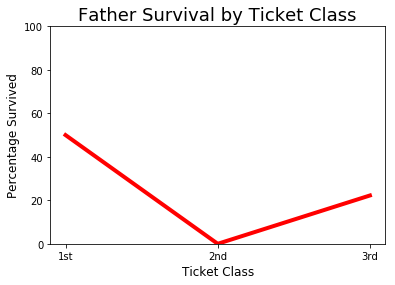

In [44]:
locations = [1, 2, 3,]
heights = list(father_means * 100)
labels=["1st", "2nd", "3rd"]
plt.plot(locations, heights, linewidth=4.0, color="r")
plt.xticks(locations, labels)
plt.title('Father Survival by Ticket Class', fontsize=18)
plt.xlabel('Ticket Class', fontsize=12)
plt.ylabel('Percentage Survived', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,100]);

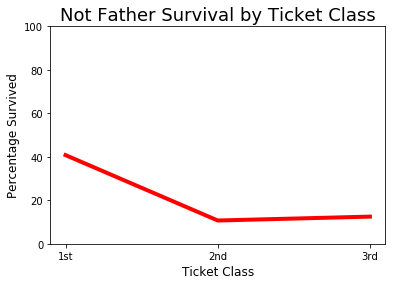

In [45]:
locations = [1, 2, 3,]
heights = list(not_father_means * 100)
labels=["1st", "2nd", "3rd"]
plt.plot(locations, heights, linewidth=4.0, color="r")
plt.xticks(locations, labels)
plt.title('Not Father Survival by Ticket Class', fontsize=18)
plt.xlabel('Ticket Class', fontsize=12)
plt.ylabel('Percentage Survived', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,100]);

The visuals above suggest that fathers with children on board had a higher survival rate for 1st  and third class passengers.

__Question 5 - Did single women have a higher survival rate than those with husbands on board?__

Our dataset description states that certain groups were more likely to survive; those being upper class, females and children, but did women that had their husband on board have a higher survival rate than those who did not?

In [46]:
#creating a filter to include both married women and single women.
women = train_df.loc[(train_df["Sex"] == 1) & (train_df["Age"] > 1) 
                         & (train_df["SibSp"] <= 1), :]

In the above filter we have included females that are over 18 and have essentially converted the SibSp to a binary variable. If the SibSp column is equal to one then they have a husband on board and if it is 0 then they do not have a husband on board. The one major issue with our filter is it will include women over 18 travelling with a single sibling.

In [47]:
women.groupby(["SibSp","Pclass"], as_index=False)["Survived"].mean()

,SibSp,Pclass,Survived
0,0,1,0.969697
1,0,2,0.931034
2,0,3,0.558140
3,1,1,1.000000
4,1,2,0.875000
5,1,3,0.440000


In the above description our filter includes 204 passengers, more without husbands on board than with and of an average age of 34. 

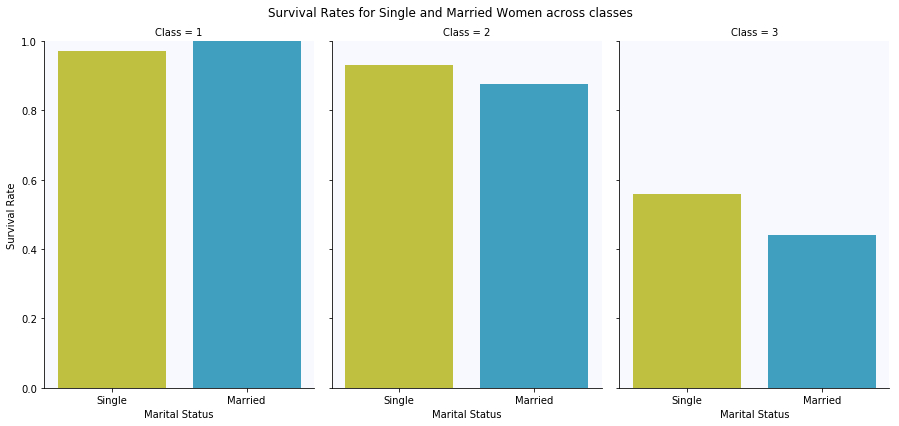

In [48]:
womenplot = sns.factorplot(x="SibSp", y="Survived", col="Pclass", data=women, saturation=0.5, kind="bar", ci=None,
                        size=6, aspect=0.7, palette=["yellow", "deepskyblue"])
womenplot.set_axis_labels("Marital Status", "Survival Rate")
womenplot.set_xticklabels(["Single", "Married"])
womenplot.set_titles("Class = {col_name}")
womenplot.set(ylim =(0, 1));
womenplot.set(facecolor = "ghostwhite")
plt.subplots_adjust(top=0.9)
womenplot.fig.suptitle("Survival Rates for Single and Married Women across classes");

Interestingly enough it would appear that 1st class married women had a slightly higher survival rate than single women, however if you were in 2nd or 3rd class, you were probably better off being single. 

The answer to our question is no, women with husbands on board did not have a better survival rate and for lower class passengers they actually had a worse survival rate, particularly for third class passengers. 

## Conclusions

The results from this analysis appear to indicate that sex and class did have an impact on survival. Females had a much higher survival rate at 74% than Males at 19%. Interestingly, survival rates for females were actually highest for the "Mature" age group and decreased as age decreased. The analysis also suggested that even children were not exempt from the trend of upper classes having higher survival rates. First class children had a survival rate of 88% whereas third class children had a survival rate of 41%. First class fathers had a higher survival rate than first class non-fathers, however this was not the case for second and third class fathers. Married women in the first class had a marginally better chance of survival than single first class women, however in second and third class single women had a higher survival rate.

The analysis suffered from a number of limitations and these include - 
-  Estimation of age data.
-  The cut off value for children was under 18. It is likely that in 1912 the cutoff would have been lower.
-  Filters for the later questions were not perfect as sibling and spouse data was collated, as was parent and child. 

Using our results from this analysis, 1st class married women in the mature age group had the best survival rate. Just out of curiosity, lets takes a look at the passengers that fit those parameters. 

In [49]:
train_df.loc[(train_df["Honorific"] == "Mrs") & (train_df["Pclass"] == 1) 
               & (train_df["Age"] == 4), :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Group,Honorific,Age_Group
268,269,1,1,1,4,0,1,3.0,2,"(146.38, 219.57]",Mrs,"(53.473, 66.737]"
366,367,1,1,1,4,1,0,1.0,0,"(73.19, 146.38]",Mrs,"(53.473, 66.737]"
513,514,1,1,1,4,1,0,1.0,0,"(-0.512, 73.19]",Mrs,"(53.473, 66.737]"
829,830,1,1,1,4,0,0,1.0,2,"(73.19, 146.38]",Mrs,"(53.473, 66.737]"
879,880,1,1,1,4,0,1,2.0,0,"(73.19, 146.38]",Mrs,"(53.473, 66.737]"


They all survived!

## References

https://stackoverflow.com/

https://seaborn.pydata.org/tutorial.html

## Machine Learning

Create a variable to determine if a passenger is travelling with family or alone.

In [50]:
for df in complete_df:
    df['With_Family'] = 1
    df.loc[(df['SibSp'] == 0) & (df['Parch'] == 0), 'With_Family' ] = 0

Create a custom feature by multiplying age with class as these are two of the most dominant factors that go into survival. This feature will be called Class_Age.

In [51]:
for df in complete_df:
    df['Class_Age'] = df['Age'] * df['Pclass']

Create a custom feature by multiplying age with sex. The feature will be called Sex_Age.

In [52]:
for df in complete_df:
    df['Sex_Age'] = df['Age'] * (df['Sex'] + 1)

We can now drop the unnecessary columns from our dataframes.

In [53]:
train_df.drop(['PassengerId'], inplace=True, axis=1)

for df in complete_df:
    df = df.drop(['Age_Group', 'Fare_Group', 'Honorific', 'SibSp', 'Parch'], inplace=True, axis=1)

### Logistic Regression

In [54]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [55]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_long = round(logreg.score(X_train, Y_train) *100, 2)
acc_long

78.790000000000006

Here we have measured the relationship between the dependent variable and the independent variables by estimating probabilities using a logistic function. Our confidence score is 80.36.

We can now use Logistic Regression to validate our assumptions and decisions for feature crceating and completing goals. This can be done by calculating the coefficient of the features in the decision function. 

Posaitive coefficients increas the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus deccrease the probability)

In [56]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,1.340478
7,Sex_Age,0.770301
3,Fare,-0.040920
5,With_Family,-0.070073
6,Class_Age,-0.222854
4,Embarked,-0.274660
0,Pclass,-0.705678
2,Age,-0.977487


### Random Forest

In [57]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

84.739999999999995

In [58]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv('output/submission.csv', index=False)

In [59]:
test_df.describe()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,With_Family,Class_Age,Sex_Age
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,1.815789,0.468900,1.401914,0.394737,3.777512,2.476077
std,120.810458,0.841838,0.481622,0.970569,1.165137,0.854496,0.489380,2.074343,1.700797
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,1100.500000,3.000000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,2.000000
75%,1204.750000,3.000000,1.000000,2.000000,0.000000,2.000000,1.000000,6.000000,4.000000
max,1309.000000,3.000000,1.000000,5.000000,5.000000,2.000000,1.000000,12.000000,10.000000
